## Observations and Insights 

In [3]:
#Downloading scipy package 
pip install scipy


Note: you may need to restart the kernel to use updated packages.


In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "Resources/Pymaceuticals_Mouse_Metadata.csv"
study_results_path = "Resources/Pymaceuticals_Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

#Preview data to find out which column you will be using to merge
print(mouse_metadata.head())
print(study_results.head())



  Mouse ID Drug Regimen     Sex  Age_months  Weight (g)
0     k403     Ramicane    Male          21          16
1     s185    Capomulin  Female           3          17
2     x401    Capomulin  Female          16          15
3     m601    Capomulin    Male          22          17
4     g791     Ramicane    Male          11          16
  Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites
0     b128          0                45.0                 0
1     f932          0                45.0                 0
2     g107          0                45.0                 0
3     a457          0                45.0                 0
4     c819          0                45.0                 0


In [3]:
# Combine the data into a single dataset
mergedlab_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
print(mergedlab_df.shape)
mergedlab_df.head()

(1893, 8)


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [4]:
# Checking the number of mice.
len(mergedlab_df['Mouse ID'].unique())

249

In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

# Adding column that marks rows as duplicate
mergedlab_df["is_duplicate"]= mergedlab_df.duplicated()

#previewing new df 
mergedlab_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,is_duplicate
0,k403,Ramicane,Male,21,16,0,45.000000,0,False
1,k403,Ramicane,Male,21,16,5,38.825898,0,False
2,k403,Ramicane,Male,21,16,10,35.014271,1,False
3,k403,Ramicane,Male,21,16,15,34.223992,1,False
4,k403,Ramicane,Male,21,16,20,32.997729,1,False


In [6]:
# Optional: Get all the data for the duplicate mouse ID. 
#I wasn't sure if you were refering to the actual row with all columns or all data.
# Below is the actual row that is a duplicate
mergedlab_dups_df = mergedlab_df[(mergedlab_df.is_duplicate == True)]

mergedlab_dups_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,is_duplicate
909,g989,Propriva,Female,21,26,0,45.0,0,True


In [7]:
# Optional: Get all the data for the duplicate mouse ID. 
#I wasn't sure if you were refering to the actual row with all columns or all data.
# Below is all of the rows associated with that paricular mouse
mergedlab_dups2_df = mergedlab_df[mergedlab_df['Mouse ID'] == 'g989']

mergedlab_dups2_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,is_duplicate
908,g989,Propriva,Female,21,26,0,45.000000,0,False
909,g989,Propriva,Female,21,26,0,45.000000,0,True
910,g989,Propriva,Female,21,26,5,48.786801,0,False
911,g989,Propriva,Female,21,26,5,47.570392,0,False
912,g989,Propriva,Female,21,26,10,51.745156,0,False
913,g989,Propriva,Female,21,26,10,49.880528,0,False
914,g989,Propriva,Female,21,26,15,51.325852,1,False
915,g989,Propriva,Female,21,26,15,53.442020,0,False
916,g989,Propriva,Female,21,26,20,55.326122,1,False
917,g989,Propriva,Female,21,26,20,54.657650,1,False


In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its Index number.

#getting list of indexes for all rows associated with mouse
indexes_of_dup_mouse = mergedlab_df[mergedlab_df['Mouse ID'] == 'g989'].index

#passing in list of indexes to drop
mergedlab_df.drop(indexes_of_dup_mouse, inplace=True)

#Also dropping the is_duplicate column as it is not needed at this point 
mergedlab_df.drop('is_duplicate', axis=1, inplace=True)


mergedlab_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [9]:
# Checking the number of mice in the clean DataFrame. The number of mice should still 
len(mergedlab_df['Mouse ID'].unique())

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.



In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function


## Bar and Pie Charts

In [67]:
 # grouping data to get get smaller df by time point and drug regimen
lab_bar_df = mergedlab_df[['Timepoint','Drug Regimen',
                           'Mouse ID']].groupby(['Timepoint','Drug Regimen']).count()


# #Changing the index from gender to number
lab_bar_df.reset_index(drop=False, inplace=True)


lab_bar_df

,Timepoint,Drug Regimen,Mouse ID
0,0,Capomulin,25
1,0,Ceftamin,25
2,0,Infubinol,25
3,0,Ketapril,25
4,0,Naftisol,25
...,...,...,...
95,45,Placebo,11
96,45,Propriva,7
97,45,Ramicane,20
98,45,Stelasyn,11


In [91]:
#Creating data for bar charts by drug regimen

#list of drugs
drug_list = ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol',
             'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol']

#Getting data for each drug (filtering by drug name)
cap_df = lab_bar_df[lab_bar_df['Drug Regimen'] == 'Capomulin']
cef_df = lab_bar_df[lab_bar_df['Drug Regimen'] == 'Ceftamin']
inf_df = lab_bar_df[lab_bar_df['Drug Regimen'] == 'Infubinol']
ket_df = lab_bar_df[lab_bar_df['Drug Regimen'] == 'Ketapril']
naf_df = lab_bar_df[lab_bar_df['Drug Regimen'] == 'Naftisol']
pla_df = lab_bar_df[lab_bar_df['Drug Regimen'] == 'Placebo']
pro_df = lab_bar_df[lab_bar_df['Drug Regimen'] == 'Propriva']
ram_df = lab_bar_df[lab_bar_df['Drug Regimen'] == 'Ramicane']
ste_df = lab_bar_df[lab_bar_df['Drug Regimen'] == 'Stelasyn']
zon_df = lab_bar_df[lab_bar_df['Drug Regimen'] == 'Zoniferol']


#creating data for each drug into a list 
cap_data = list(cap_df['Mouse ID'])
cef_data = list(cef_df['Mouse ID'])
inf_data = list(inf_df['Mouse ID'])
ket_data = list(ket_df['Mouse ID'])
naf_data = list(naf_df['Mouse ID'])
pla_data = list(pla_df['Mouse ID'])
pro_data = list(pro_df['Mouse ID'])
ram_data = list(ram_df['Mouse ID'])
ste_data = list(ste_df['Mouse ID'])
zon_data = list(zon_df['Mouse ID'])

# List of diff time points 
timepoint = list(lab_bar_df['Timepoint'].unique())


# turning list into individual series
tp_ser = pd.Series(timepoint)
cap_ser = pd.Series(cap_data)
cef_ser = pd.Series(cef_data)
inf_ser = pd.Series(inf_data)
ket_ser = pd.Series(ket_data)
naf_ser = pd.Series(naf_data)
pla_ser = pd.Series(pla_data)
pro_ser = pd.Series(pro_data)
ram_ser = pd.Series(ram_data)
ste_ser = pd.Series(ste_data)
zon_ser = pd.Series(zon_data)

# concating series into df columns
newdrug_df = pd.concat([tp_ser, cap_ser,cef_ser,inf_ser,ket_ser,
                        naf_ser,pla_ser,pro_ser,ram_ser,ste_ser,zon_ser], axis=1)

# renaming columns
newdrug_df.columns=['Time Point','Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol',
             'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol']

newdrug_df


,Time Point,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,25,25,25,25,25,25,24,25,24,25
1,5,25,21,25,23,23,24,23,25,23,24
2,10,25,20,21,22,21,24,21,24,21,22
3,15,24,19,21,19,21,20,15,24,21,21
4,20,23,18,20,19,20,19,15,23,19,17
5,25,22,18,18,19,18,17,13,23,18,16
6,30,22,16,17,18,15,15,12,23,17,15
7,35,22,14,12,17,15,14,9,21,15,14
8,40,21,14,10,15,15,12,9,20,12,14
9,45,21,13,9,11,13,11,7,20,11,14


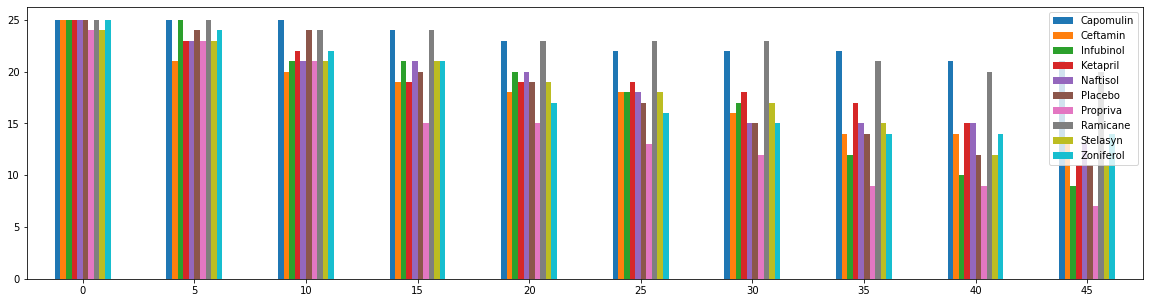

<Figure size 432x288 with 0 Axes>

In [89]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
lab_bar_df_plot = newdrug_df[['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol',
             'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol']].plot(kind='bar', figsize=(20,5))

lab_bar_df_plot.set_xticklabels(newdrug_df['Time Point'],rotation=360)


plt.show()
plt.tight_layout()




[25, 25, 25, 24, 23, 22, 22, 22, 21, 21]
[25, 21, 20, 19, 18, 18, 16, 14, 14, 13]
[25, 25, 21, 21, 20, 18, 17, 12, 10, 9]


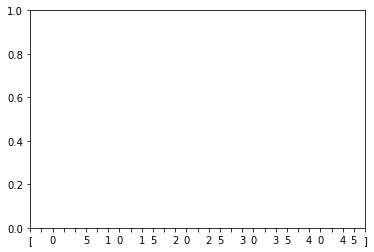

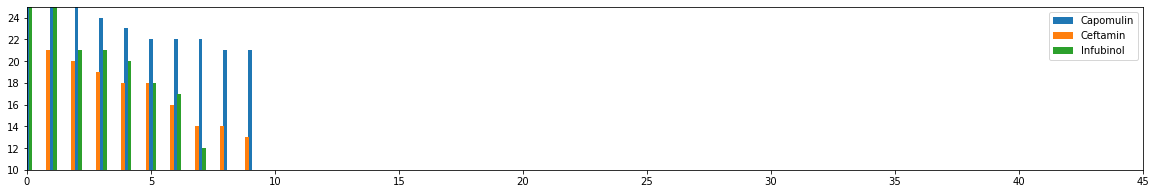

<Figure size 432x288 with 0 Axes>

In [79]:
# Generate a bar plot showing the total number of mice for each treatment 
#throughout the course of the study using pyplot.

timepoint = list(str(lab_bar_df['Timepoint'].unique()))
x_label = np.arange(len(timepoint))
plt.xticks(x_label,timepoint)
print(cap_data)
print(cef_data)
print(inf_data)
# ket_data
# naf_data
# pla_data
# pro_data
# ram_data
# ste_data
# zon_data
width =0.15
plt.figure(figsize=(20,3))
plt.xlim(0,45)
plt.ylim(10,25)
plt.bar(np.arange(len(cap_data)), cap_data, width=width, label='Capomulin')
plt.bar(np.arange(len(cef_data))-.14, cef_data, width=width, label='Ceftamin')
plt.bar(np.arange(len(inf_data))+ .14, inf_data, width=width, label='Infubinol')
plt.legend()
#plt.bar(x_values,y_values)
# plt.xlabel('Years')
# plt.ylabel('Violent Crime Rate')
plt.show()
plt.tight_layout()


In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas



In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
